In [9]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [10]:
df = 'data/global air pollution dataset.csv'
air = pd.read_csv(df)

In [11]:
air.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


## Preparing X and Y variables

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encoding categorical columns to integers
for column in air.select_dtypes(include=['object']).columns:
    air[column] = LabelEncoder().fit_transform(air[column])

In [13]:
x = air.drop(columns = ['PM2.5 AQI Value'], axis=1)

In [14]:
y= air['PM2.5 AQI Value']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [16]:
air.shape

(23463, 12)

In [17]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((18770, 11), (4693, 11))

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 7.8931
- Mean Absolute Error: 4.7287
- R2 Score: 0.9792
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.8828
- Mean Absolute Error: 4.6826
- R2 Score: 0.9795


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.3633
- Mean Absolute Error: 4.7905
- R2 Score: 0.9766
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.3263
- Mean Absolute Error: 4.7205
- R2 Score: 0.9771


Ridge
Model performance for Training set
- Root Mean Squared Error: 7.8931
- Mean Absolute Error: 4.7292
- R2 Score: 0.9792
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7.8828
- Mean Absolute Error: 4.6832
- R2 Score: 0.9795


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 7.1236
- Mean Absolute Error: 4.4857
- R2 Score: 0.9831
-----------------------

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.993203
5,Random Forest Regressor,0.992942
6,XGBRegressor,0.990055
4,Decision Tree,0.985815
0,Linear Regression,0.979508
2,Ridge,0.979508
1,Lasso,0.977137
3,K-Neighbors Regressor,0.976597
8,AdaBoost Regressor,0.942993


### Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 97.95


#### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

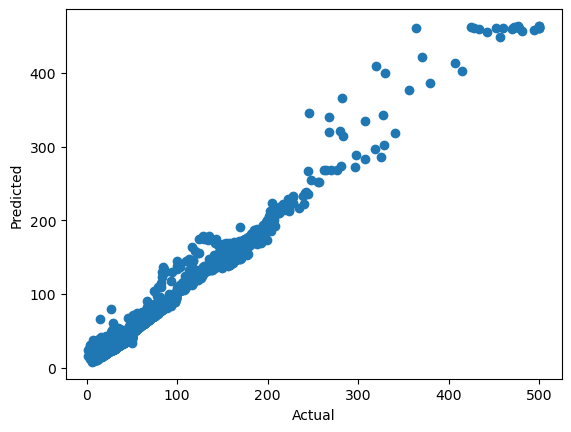

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='PM2.5 AQI Value'>

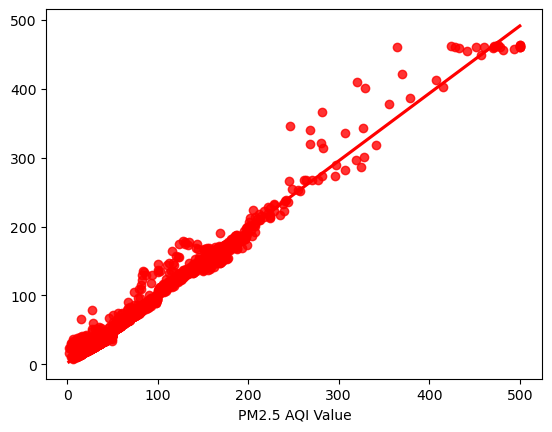

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
11972,58,59.114407,-1.114407
3274,22,19.967049,2.032951
20011,47,39.791511,7.208489
3501,80,76.752769,3.247231
14752,20,18.539699,1.460301
...,...,...,...
4049,71,68.337066,2.662934
9356,54,57.802411,-3.802411
795,161,156.751293,4.248707
396,57,56.884494,0.115506
